# Анализ динамики интенсивности дорожного кольцевого одностороннего движения для случая трёх городов

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
a = 219.7 # 55l/700km * 60km * 46,6 rub/l
b1 = 142 # 83 + 59
b2 = 134 # 67 + 67
gamma = 15
T0 = 25
h = 8
q = 100
p_min = 2.08 # 20000 / 20 / 8 / 60
p_max = 52.1 # 200000 / 20 / 8 / 60
c = p_max*p_min/(p_max - p_min)
d = -p_min/(p_max - p_min)

T = lambda x: T0 + gamma*x**4

def t_vec(x_v):
    t_vec = 0.0 * x_v
    for i in range(len(x_v)):
        t_vec[i] = sum([T(sum(intense)) for intense in \
                       [x_v[:j+1] for j in range(len(x_v)-i-1, len(x_v))] + [x_v[j:] for j in range(len(x_v)-i)]])
    return t_vec

p_vec = lambda x_v: (a + h*q - b1) / (b2 - t_vec(x_v))
x_vec = lambda p_v: (c/p_v + d)/len(p_v) # модифицированный и нормированный закон Ципфа

Public transport cost is OK
Route time for an auto is OK
Private transport effectiveness is OK for VIP people
Public transport effectiveness is OK for VIP people
Model converges (0.156396)


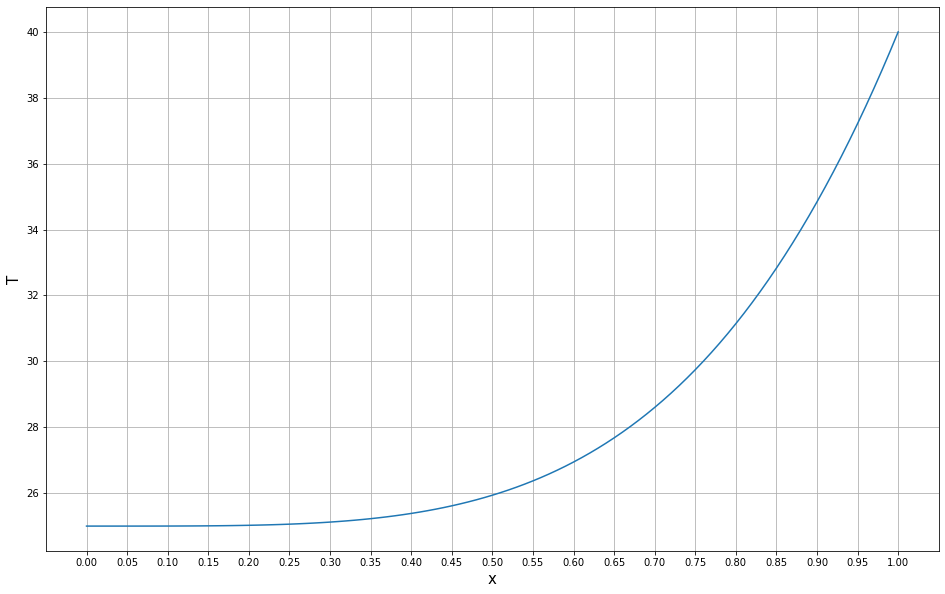

In [103]:
x_0 = np.array([0.4, 0.4])

if b1 >= a:
    print('Public transport is more expensive than auto! (%d >= %d)'%(b1, a))
else:
    print('Public transport cost is OK')
    
if t_vec(np.array([0.5, 0.5]))[0] >= b2:
    print('Auto is slower than public transport! (%d >= %d)'%(t_vec(np.array([0.5, 0.5]))[0], b2))
else:
    print('Route time for an auto is OK')
    
if ((a + h*q + p_max*t_vec(np.array([0.5, 0.5])) >= b1 + p_max*b2).any()):
    print('Private transport is worse for VIP people! (%d >= %d)'%(a + h*q + p_max*t_vec(np.array([0.5, 0.5])),
                                                                   b1 + p_max*b2))
else:
    print('Private transport effectiveness is OK for VIP people')
          
if ((a + h*q + p_max*t_vec(np.array([0, 0])) <= b1 + p_min*b2).any()):
    print('Public transport is worse for economic people! (%d <= %d)'%(a + h*q + p_max*t_vec(np.array([0, 0])),
                                                                       b1 + p_min*b2))
else:
    print('Public transport effectiveness is OK for VIP people')
          
if 2*c*gamma/(a + h*q - b1) * (2*(sum(x_0)**3)
                               + np.sqrt((2*(sum(x_0)**3) + x_0[0]**3) * (2*(sum(x_0)**3) + x_0[1]**3))) >= 1:
    print("Model with covergency coef %f may not converge..."%(2*c*gamma/(a + h*q - b1) * (2*(sum(x_0)**3)
                               + np.sqrt((2*(sum(x_0)**3) + x_0[0]**3) * (2*(sum(x_0)**3) + x_0[1]**3)))))
else:
    print("Model converges (%f)"%(2*c*gamma/(a + h*q - b1) * (2*(sum(x_0)**3)
                               + np.sqrt((2*(sum(x_0)**3) + x_0[0]**3) * (2*(sum(x_0)**3) + x_0[1]**3)))))
    

plt.figure(figsize=(16, 10))
X = np.linspace(0, 1, 101)
plt.xlabel('x', size=15)
plt.ylabel('T', size=15)
plt.plot(X, [T(x) for x in X])
plt.xticks(np.linspace(0, 1, 21))
plt.grid()
plt.show()

In [108]:
def plot_convergency(x_start, iterations=5):
    x_new = x_start
    p_new = p_vec(x_start)
    X = [x_new]
    P = [p_new]
    for it in range(iterations):
        x_new = x_vec(p_new)
        X += [x_new]
        P += [p_new]
        p_new = p_vec(x_new)
        X += [x_new]
        P += [p_new]
        print(x_new, p_new)
    
    plt.figure(figsize=(16, 10))
    X_lin = np.linspace(0, 0.5, 101)
    P_lin = np.linspace(p_min, p_max, 101)
    plt.xlabel(r'$x_1$', size=15)
    plt.ylabel(r'$p_1(x)$', size=15)
#     plt.plot(X_lin, [p(x) for x in X_lin], label='p(x)')
#     plt.plot([x(p) for p in P_lin], P_lin, label='x(p)')
    plt.scatter([x[0] for x in X], [p[0] for p in P])
    for xs, ps, xf, pf in zip([x[0] for x in X][:-1], [p[0] for p in P][:-1],
                              [x[0] for x in X][1:], [p[0] for p in P][1:]):
        plt.arrow(xs, ps, xf-xs, pf-ps, length_includes_head=True, head_width=0.005, head_length=0.2)
    plt.xticks(np.linspace(0, 0.5, 21))
    plt.yticks(np.linspace(min([p[0] for p in P]), max([p[0] for p in P]), 21))
#     plt.legend()
    plt.grid()
    plt.show()
    
    print("x = %s"%(X[-1]))

[0.03638577 0.03638577] [14.87648995 14.87648995]
[0.05202433 0.05202433] [14.87718551 14.87718551]
[0.05202093 0.05202093] [14.87718527 14.87718527]
[0.05202093 0.05202093] [14.87718527 14.87718527]
[0.05202093 0.05202093] [14.87718527 14.87718527]


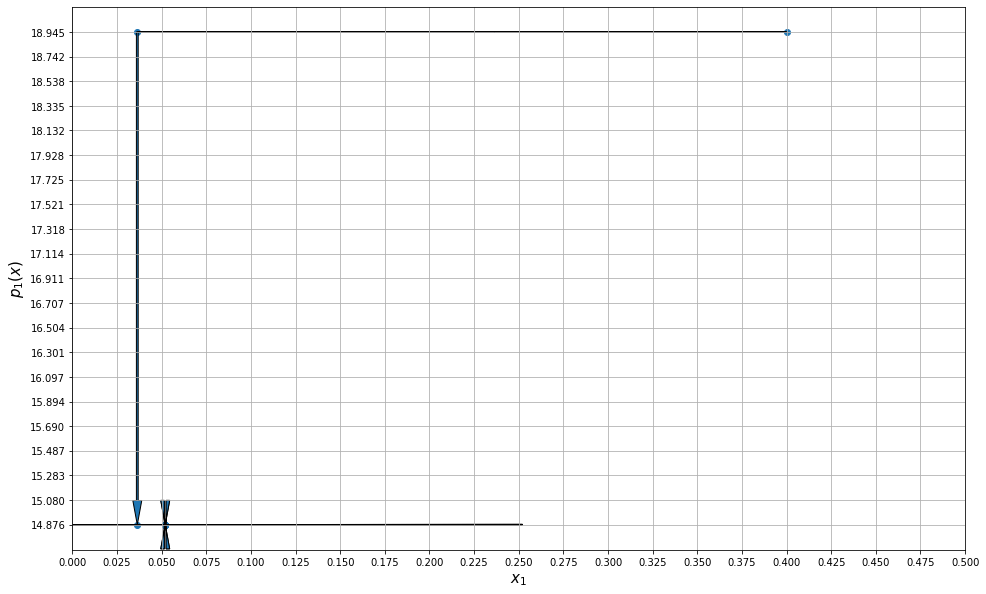

x = [0.05202093 0.05202093]


In [109]:
plot_convergency(x_0)